In [69]:
from keras.models import Sequential
from keras.layers import Activation,Dense
from IPython.display import Image, SVG
from keras.utils.vis_utils import model_to_dot
import numpy as np

In [70]:
mnist= np.load('mnist.npz')

In [71]:
mnist.files

['x_test', 'x_train', 'y_train', 'y_test']

In [72]:
x_train,x_test=mnist['x_train'],mnist['x_test']

In [73]:
# normalize the data
max_value_mnsit= float(x_train.max())
x_train = x_train.astype('float32')/max_value_mnsit
x_test = x_test.astype('float32')/max_value_mnsit


In [74]:
# reshape the data
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[1])
x_test= x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[1])

In [75]:
# simple autoencoder
input_dim= x_train.shape[1]
encoded_dim =32
compress_factor = float(input_dim/ encoded_dim)

print("compress factor is {}".format(compress_factor))

compress factor is 24.5


In [76]:
auto_encoder = Sequential()

auto_encoder.add(Dense(encoded_dim, input_shape=(input_dim,), activation='relu'))
auto_encoder.add(Dense(input_dim,activation='sigmoid'))

In [77]:
auto_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


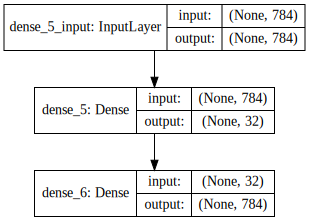

In [78]:
SVG(model_to_dot(auto_encoder,show_shapes=True).create(prog='dot',format='svg'))

In [79]:
auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [80]:
auto_encoder.fit(x_train,x_train,validation_data=(x_test,x_test),batch_size=256,epochs=50,shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.2743 - val_loss: 0.1904
Epoch 2/50
60000/60000 [==============================] - 3s - loss: 0.1705 - val_loss: 0.1530
Epoch 3/50
60000/60000 [==============================] - 2s - loss: 0.1439 - val_loss: 0.1339
Epoch 4/50
60000/60000 [==============================] - 2s - loss: 0.1287 - val_loss: 0.1215
Epoch 5/50
60000/60000 [==============================] - 2s - loss: 0.1185 - val_loss: 0.1131
Epoch 6/50
60000/60000 [==============================] - 2s - loss: 0.1114 - val_loss: 0.1070
Epoch 7/50
60000/60000 [==============================] - 2s - loss: 0.1061 - val_loss: 0.1025
Epoch 8/50
60000/60000 [==============================] - 2s - loss: 0.1022 - val_loss: 0.0993
Epoch 9/50
60000/60000 [==============================] - 2s - loss: 0.0995 - val_loss: 0.0970
Epoch 10/50
60000/60000 [==============================] - 2s - loss: 0.0975 - val_loss: 0.0955

In [89]:
x_test_image=np.random.randint(x_test.shape[1],size=10)

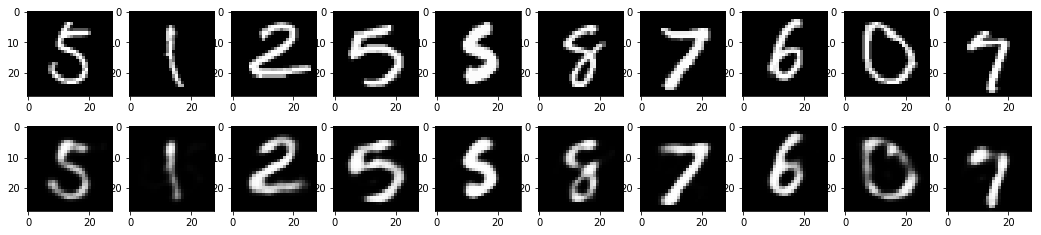

In [94]:
# decoded images
decond_img=auto_encoder.predict(x_test) 
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
for i,images_test in enumerate(x_test_image):
    
    ax=plt.subplot(3,10,i+1)
    plt.imshow(x_test[images_test].reshape(28,28))
    plt.gray()
    
    
    ax=plt.subplot(3,10,10+i+1)
    plt.imshow(decond_img[images_test].reshape(28,28))
    plt.gray()
    
    